In [1]:
print("Om Gam Ganapataye Namah")

Om Gam Ganapataye Namah


In [2]:
# now its time to create our first convnet , this is for the purpose of getting familiar with CNN architectures. 
# we will talk about how to boost its perfo later 

In [ ]:
# We know what multi-class classification is — it’s the problem of classifying each instance
# of data into one of two or more classes. In a multi-class setting, the classes are mutually 
# exclusive which means a single instance of data can belong to one and only class. It cannot 
# belong to more than one class of target variables at the same time! A typical example of a
# multi-class classification is that a person can either be a male, female
# or a transgender but it cannot be all three at the same time. You get the idea!



# In case of multi-label classification tasks, a single instance of data can simultaneously 
# belong to two or more classes of target variables. Hence, we can say that the predicted 
# classes are not mutually exclusive.


# For example, a movie can belong to either of these genres — crime, adventure, thriller, 
# drama or it can belong to all four of them simultaneously. Remember Dark Knight Rises?
# (It’s one of my most favorite movie though!) So the key takeaway is, in a multi-label 
# classification problems there is no constraint on how many classes each of the data instances can be assigned to!

# That same news is present under the categories of India, Technology, Latest etc. because it has been classified into these different labels. Thus making it a multi label classification problem.

# https://medium.com/@saugata.paul1010/a-detailed-case-study-on-multi-label-classification-with-machine-learning-algorithms-and-72031742c9aas

# Applying Convolutional Neural Network on the MNIST dataset

* Convolutional Neural Networks have changed the way we classify images. It is being used in 
* almost all the computer vision tasks. From 2012, CNN’s have ruled the Imagenet competition, 
* dropping the classification error rate each year. MNIST is the most studied dataset (link).

* The state of the art result for MNIST dataset has an accuracy of 99.79%. In this article, we
* will achieve an accuracy of 99.55%

# What is the MNIST dataset?

"database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

* MNIST dataset contains images of handwritten digits. It has 60,000 grayscale images under 
* the training set and 10,000 grayscale images under the test set. We will use the Keras library 
* with Tensorflow backend to classify the images.

### There are many popular CNN architectures which can be used to achieve better   accuracy on MNIST dataset, some of these architectures are:

VGG[4]

Resnet[5]

LeNet-5[6]
### https://mohitatgithub.github.io/2018-03-28-MNIST-Image-Classification-with-CNN-&-Keras/

In [ ]:
## We know, In each Conv Layer the network tries to understand the basic patterns. 
# For example: In the First layer, the network tries to learn patterns and edges. 
# In the second layer, it tries to understand the shape/color and other stuff. 
# A final layer called Feature layer/Fully Connected Layer tries to classify the image.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
'''
The MNIST dataset
This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.
'''

In [3]:
# Import the MNIST dataset using TensorFlow built-in feature
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# The variable x_test contains pictures on which we will check whether
# the taught neural network can correctly recognize a digit that it has not seen before (on which it did not learn)

#  To check if the neural network has correctly evaluated the content of the image, we must 
# also have labels for the test set, which are located in the variable y_test. 

In [4]:
print('Training data shape: ', x_train.shape)
print('Testing data shape : ', x_test.shape)

Training data shape:  (60000, 28, 28)
Testing data shape :  (10000, 28, 28)


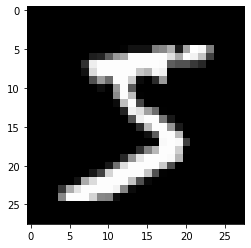

In [5]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

## Preprocess the data
* The image data cannot be fed directly into the model so we need to perform some operations and 
* process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28).
* The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [ ]:
# The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. 
#The shape of X_test is (10000, 28, 28).

# The input shape that a CNN accepts should be in a specific format. 
#If you are using Tensorflow, the format should be (batch, height, width, channels). 
# If you are using Theano, the format should be (batch, channels, height, width).

In [6]:
# To work with the Keras API, we need to reshape each image to the format of (M x N x 1).

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
print(x_train[0].shape, 'train samples')
# By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images

(28, 28, 1) train samples


In [ ]:
# The last number is 1, which signifies that the images are greyscale.

In [9]:
print(y_train)

[5 0 4 ... 5 6 8]


In [8]:
batch_size = 128
num_classes = 10
epochs = 2 # n machine learning, a parameter often referred to as epochs appears – 
# it specifies how many times the training set will be used in the learning process.
# Here, to teach a neural network, we will go through a training set 10 times, which means that 
# the network will see 600,000 data samples in total.

# We have to specify how many times we want to iterate on the whole training set (epochs) 
# and how many samples we use for one update to the model's weights (batch size).

In [9]:
tensorboard = TensorBoard(log_dir="C:/Users/Home/logs",write_images=True)

# tensorboard --logdir C:\\users\welcome\logs   --->> correct one 

#  tensorboard dev upload --logdir \
#       'C:\\users\welcome\logs'     ---> syntax

#tensorboard = TensorBoard(log_dir='/logs',write_images=True)
#! tensorboard --log_dir='/logs'   # dont specify the path in quotes in windows

In [10]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
'''
The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some
scaling of input values when using neural network models. Because the scale is well known and
well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing 
each value by the maximum of 255.
'''

In [55]:
#As expected, the pixel values range from 0 to 255: the background majority close to 0, and those close to 255 representing the digit.

#Normalizing the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we're using stochastic gradient descent to find the optimal weights for the network.

#Let's reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.

In [11]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [46]:
# So far the truth (Y in machine learning lingo) we'll use for training still holds integer values from 0 to 9.

print(np.unique(y_train, return_counts=True))

(array([0., 1.], dtype=float32), array([540000,  60000], dtype=int64))


In [ ]:
# Let's encode our categories - digits from 0 to 9 - using one-hot encoding. 
# The result is a vector with a length equal to the number of categories. The vector is all 
# zeroes except in the position for the respective category. Thus a '5' will be represented by [0,0,0,0,1,0,0,0,0].

In [ ]:
# We need to ‘one-hot-encode’ our target variable. This means that a column will be created 
# for each output category and a binary variable is inputted for each category. 
# For example, we saw that the first image in the dataset is a 5. This means that the sixth number 
#in our array will have a 1 and the rest of the array will be filled with 0.

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [149]:
28 * 28
9*64

576

### For this network architecture we can use the Keras Sequential Model. We can stack layers using the .add() method

### In order to introduce nonlinearities into the network and elevate it beyond the capabilities of a simple perceptron we also add activation functions to the hidden layers. The differentiation for the training via backpropagation is happening behind the scenes without having to implement the details.

In [ ]:
* The input vector dimension is given only for the first layer, because the size of the input vectors for 
* subsequent ones will be calculated automatically based on the number of neurons in subsequent layers.
* each layer as the first argument takes the size of the output vector for the layer. As you can see from
* the model below, the first layer accepts 784 parameters and outputs 1024. The next one must naturally
* intakes 1024 (therefore for the next ones we do not have to specify the size of the input vector) and emits 128, etc.
* the number of layers and the size of the output vectors from each layer are arbitrary, but it should be 
* remembered that the last layer must emit: 1 value for regression (because we predict one value) or n values for the n-class classification. For binary classification it will be 2. In our case, we have 10 classes, so it is a value of 10.

## The five steps in the life-cycle are as follows:

* Define the model.
* Compile the model.
* Fit the model.
* Evaluate the model.
* Make predictions.
* Let’s take a closer look at each step in turn. *

# Define a model

In [15]:
# To create the model, we first initialize a sequential model. It creates an empty model object.
# The model type that we will be using is Sequential. 
# Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
model = Sequential()
# The first step is to add a convolutional layer which takes the input image:

# Keras expects the first layer to be informed of the shape of the input vector. 
# You can use the input_shape parameter, which expects a tuple consisting of the input vector dimension

# Keras allows us to specify the number of filters we want and the size of the filters.
# So, in our first layer, 32 is number of filters and (3, 3) is the size of the filter. 
# 64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted 
# to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well, so we
# will stick with this for now.

# We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.
# Layer 1 
# the input shape 28x28x1 and we will rocess 32 filters of size 3x3 over input data. we will also applied the 
# activation function relu to theoutput of each convoution operation
# the next set of layers do very similar things but take as input the feature map from the prev layer 
# Conv2D: this method creates a convolutional layer. The first parameter is the filter count, 
# and the second one is the filter size. For example in the first convolution layer we create 32 filters of size 3x3

#model.add(Conv2D(1, kernel_size=(3, 3),
    #             activation='relu',
        #         input_shape=(28,28,1)))
#
#model.get_weights()
#model.kernel_size

In [108]:
# define a vertical line detector
vlineDet = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(vlineDet), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [40]:
model.get_weights()

[array([[[[ 0.12476896,  0.08174485, -0.06657714, -0.10124413,
           -0.07854723,  0.07004842, -0.07593303, -0.07280076,
           -0.09521513,  0.09047836,  0.06894808, -0.03536412,
           -0.03604501, -0.08731219,  0.02588451,  0.04838005,
            0.11865993, -0.04395049,  0.09961154,  0.10861908,
            0.08014916,  0.11550729, -0.09222423,  0.12334092,
           -0.00163083, -0.06483394,  0.12600537,  0.01644716,
            0.07535566,  0.12270541, -0.0134646 ,  0.12189411]],
 
         [[-0.08766097,  0.06594127, -0.1162606 , -0.0264734 ,
            0.07644317,  0.13059779, -0.08578703, -0.12917174,
            0.02137204, -0.0918979 ,  0.03300735, -0.04323246,
           -0.03240287, -0.03886458, -0.11469144, -0.10158876,
            0.10355392,  0.07070005,  0.00939541, -0.03623387,
           -0.10741813, -0.02675378,  0.10431537,  0.0495555 ,
           -0.01708156,  0.07265083, -0.0557232 , -0.13018839,
           -0.11880787, -0.13864551,  0.13672112, -

In [115]:
model.get_layer

<bound method Network.get_layer of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001D769124588>>

In [17]:
model.trainable_variables

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [13]:
# To create the model, we first initialize a sequential model. It creates an empty model object.
# The model type that we will be using is Sequential. 
# Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
model = Sequential()
# The first step is to add a convolutional layer which takes the input image:

# Keras expects the first layer to be informed of the shape of the input vector. 
# You can use the input_shape parameter, which expects a tuple consisting of the input vector dimension

# Keras allows us to specify the number of filters we want and the size of the filters.
# So, in our first layer, 32 is number of filters and (3, 3) is the size of the filter. 
# 64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted 
# to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well, so we
# will stick with this for now.

# We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.
# Layer 1 
# the input shape 28x28x1 and we will rocess 32 filters of size 3x3 over input data. we will also applied the 
# activation function relu to theoutput of each convoution operation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
# the next set of layers do very similar things but take as input the feature map from the prev layer 
# Conv2D: this method creates a convolutional layer. The first parameter is the filter count, 
# and the second one is the filter size. For example in the first convolution layer we create 32 filters of size 3x3


# n this case, we will add a  convolutional layer with 64 filters 
model.add(Conv2D(64, (3, 3), activation='relu'))



# Next we will use the ‘add()’ function to add layers to our model.
# 64 in the first layer and 32 in the second layer are the number of nodes in each layer.
# Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.s
model.add(MaxPooling2D(pool_size=(2, 2)))
# The next layer is a regularization layer using dropout called Dropout. It is configured to 
# randomly exclude 25% of neurons in the layer in order to reduce overfitting.
model.add(Dropout(0.25))
# We also add dropout layers in between, dropout randomly switches off some neurons in the 
# network which forces the data to find new paths.

# Next and then Flatten, which will help to convert a 3-d Array to 1-d.
#  After finishing the previous two steps, we're supposed to have a pooled feature map by now
#  ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.
# # flatten 28*28 images to a 784 vector for each image
model.add(Flatten())
#In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. 
#Flatten serves as a connection between the convolution and dense layers.
# Next a fully connected layer with 128 neurons and rectifier activation function.
# Once we’ve flattened the data into a 1D array, we can add a dense hidden layer, 
# which is normal to a traditional neural network. Next, add another dropout layer before
# adding a final dense layer which classifies the data:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# We will have 10 nodes in our output layer, one for each possible outcome (0–9).
model.add(Dense(num_classes, activation='softmax'))
# The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted
# as probabilities. The model will then make its prediction based on which option has the highest probability.

# Once we’ve flattened the data into a 1D array, we can add a dense hidden layer, which is 
# normal to a traditional neural network. Next, add another dropout layer before adding a final 
# dense layer which classifies the data:



#‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.
# We will have 10 nodes in our output layer, one for each possible outcome (0–9).
# The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output 
# can be interpreted as probabilities. The model will then make its prediction based 
# on which option has the highest probability.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
'''
So, let us say we have a 28
x 28 x 1 image and we have a filter of size 3 x
3 x 1 using which we will be able to position
the filter at 26 possible positions along the
width as well as on the height. So, the final
position of the filter will be at position 26. So,
this is how we get 26 x 26 x 1 output of the
convolution.
'''


((3x3x32)+1)x64=18496 parameters  
64 conv. Filters(3x3), stride=1   ==> 18496

# http://ceur-ws.org/Vol-2823/Paper3.pdf
# https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/
# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

# Visualize the filter 

#CNN uses learned filters to convolve the feature maps from the previous layer. Filters are two- dimensional weights and these weights have a spatial relationship with each other.
* The steps you will follow to visualize the filters.
* Iterate through all the layers of the model using model.layers
* If the layer is a convolutional layer, then extract the weights and bias values using get_weights() for that layer.
* Normalize the weights for the filters between 0 and 1
* Plot the filters for each of the convolutional layers and all the channels. For Color image, you will have three channels for RGB. For a grayscale image, the number of channels will be 1

In [19]:
for layer in model.layers:
    filters, bias= layer.get_weights()
#print('filters shape' ,filters[:,:,:,1])
    print(filters)

[[[[-0.02997766 -0.08249976 -0.09303455 -0.12331337 -0.07125105
     0.0363888   0.12896742 -0.03412063  0.07791181  0.07820578
     0.12475823  0.01992708  0.00415516  0.03047895  0.00345421
     0.07661051  0.06886464 -0.04153012 -0.13975337  0.00557941
    -0.00588487 -0.09748457 -0.09159986  0.1230704   0.04648967
     0.00758368 -0.00965017 -0.10751915 -0.00504413 -0.02437229
     0.01441337  0.0693188 ]]

  [[ 0.11745207 -0.05092926  0.03304663 -0.07933349 -0.0092916
     0.00189006  0.0498184   0.04075827  0.09567298  0.08886322
     0.12243901 -0.05106626  0.09102207 -0.08551044 -0.10545548
     0.07393076  0.09192091  0.05672599  0.02165452  0.03428884
     0.063684    0.01932772 -0.04850255  0.06663214  0.10680491
     0.09467123 -0.05546355 -0.00417109  0.13929267 -0.11205412
     0.01134098 -0.05924514]]

  [[ 0.09426104  0.04256582  0.13090171 -0.06601783  0.08925767
     0.13258599 -0.08149727 -0.08360454  0.0415303   0.09006493
    -0.06251005 -0.09734505  0.00298558  0.

ValueError: not enough values to unpack (expected 2, got 0)

In [33]:
9*32

288

conv2d_2 (3, 3, 1, 32)
32
0


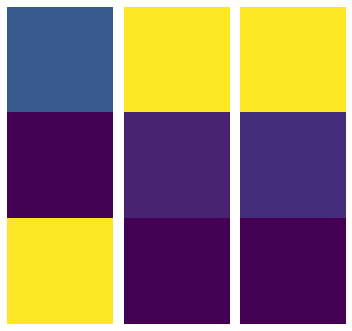

1


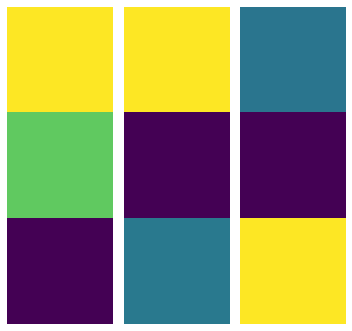

2


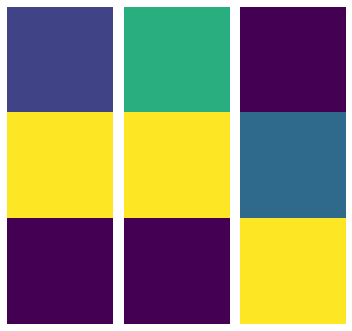

3


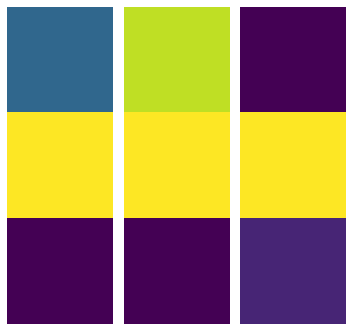

4


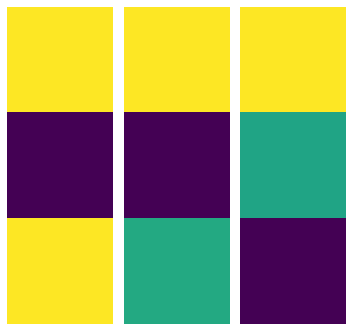

5


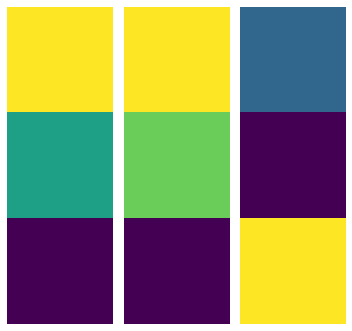

6


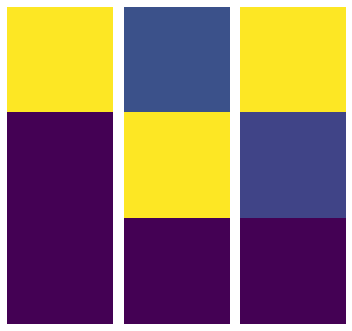

7


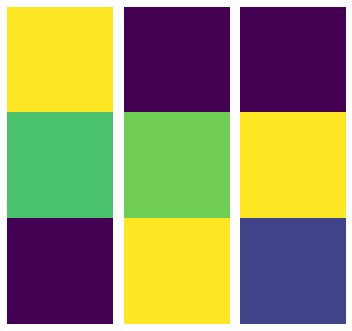

8


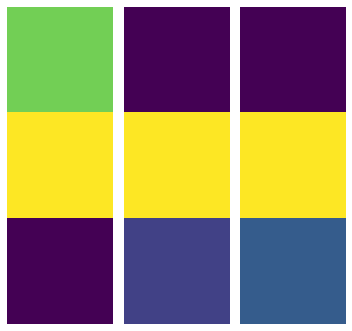

9


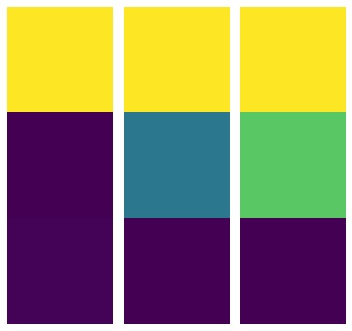

10


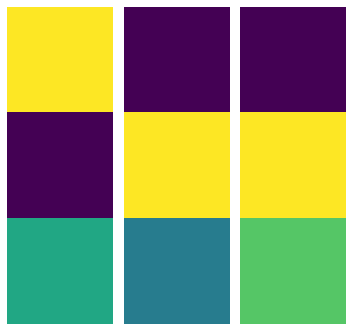

11


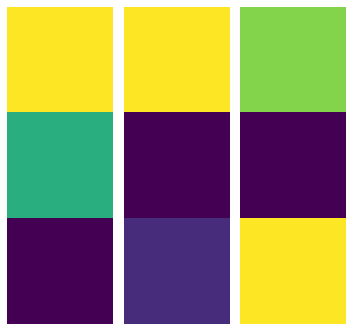

12


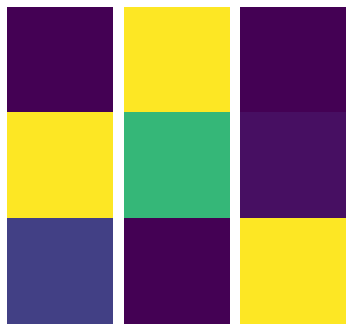

13


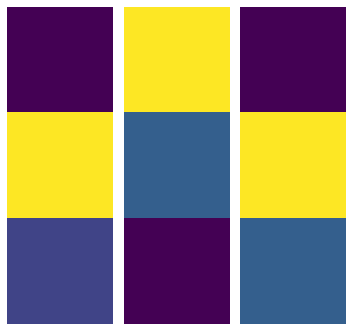

14


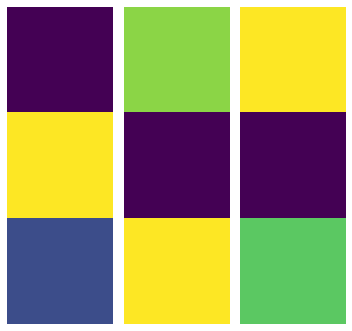

15


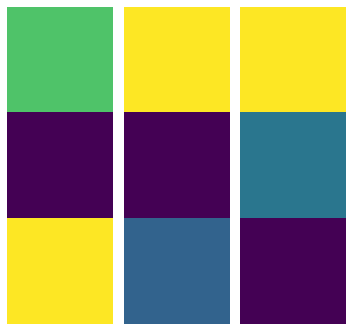

16


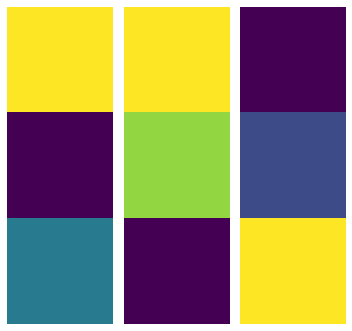

17


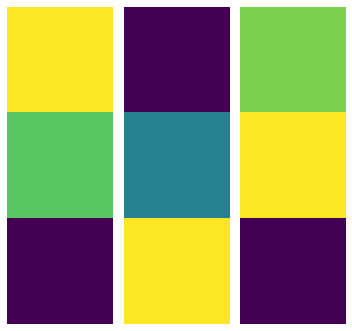

18


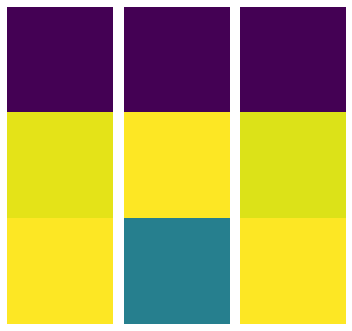

19


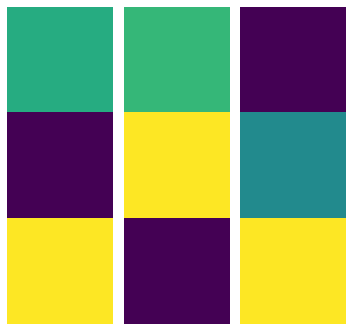

20


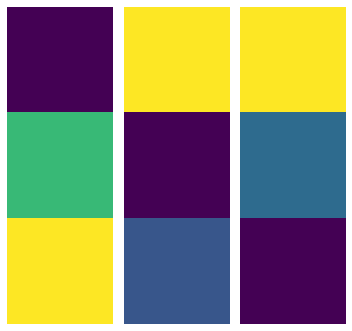

21


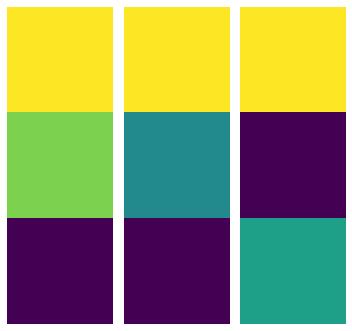

22


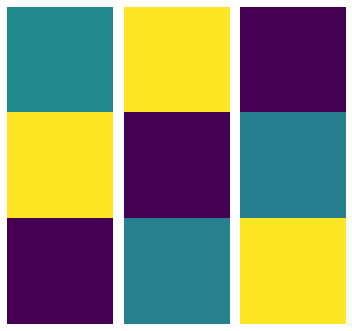

23


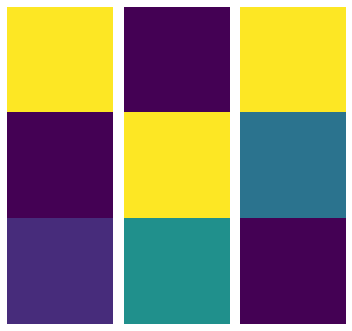

24


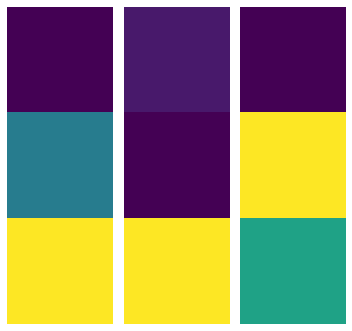

25


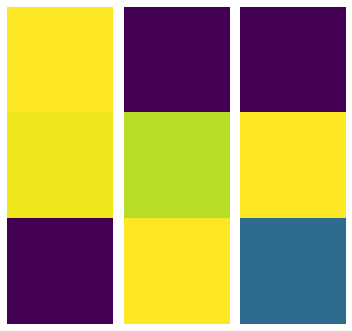

26


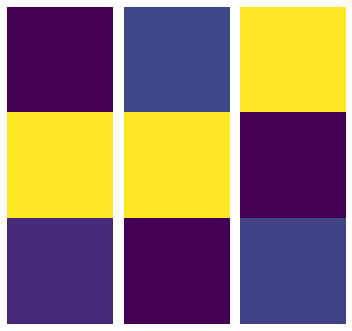

27


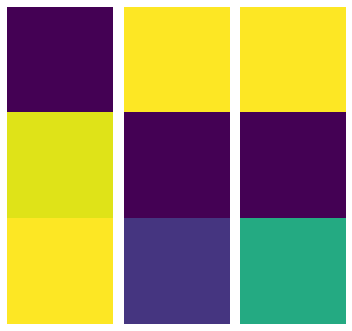

28


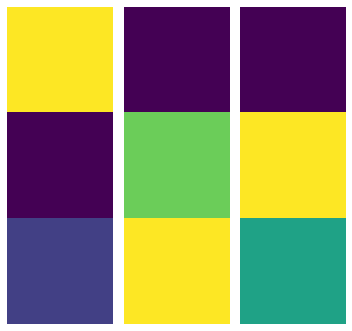

29


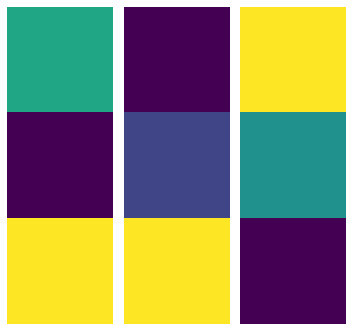

30


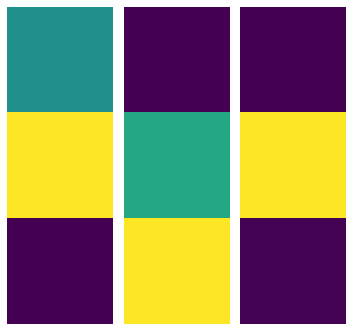

31


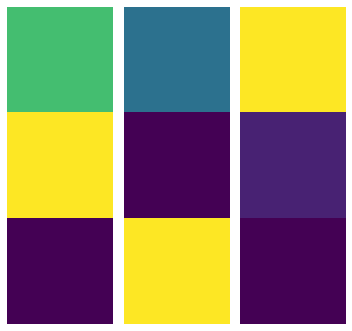

conv2d_3 (3, 3, 32, 64)
64
0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


In [53]:
# https://towardsdatascience.com/@arshren
# https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            print(i)
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

conv2d_2 (3, 3, 1, 32)
32
[[[0.48098376]
  [0.3091092 ]
  [0.92305005]]

 [[0.9354818 ]
  [0.32662886]
  [0.25994942]]

 [[0.8585023 ]
  [0.346942  ]
  [0.27077532]]]
3


AttributeError: 'tuple' object has no attribute 'set_xticks'

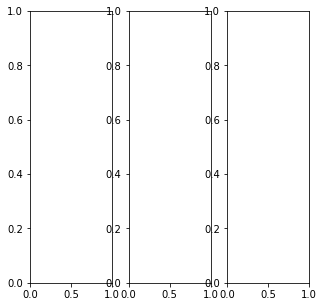

In [57]:
#Visualizing the filters
#plt.figure(figsize=(5,5))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            print(filt)
            print(filters.shape[0])
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
               # ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax=plt.subplots(1, 3, figsize=(5,5))
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,j])
                filter_cnt+=1
        plt.show()

In [32]:
for i in model.layers:
    print(i)
    

In [44]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
#model.set_weights(weights)
# confirm they were stored
print(model.get_weights())

[array([[[[-0.18970339, -0.12138163, -0.19653699,  0.13805361,
          -0.14092238,  0.1387037 ,  0.17689975,  0.03933096,
          -0.13276833,  0.18121709, -0.16604748,  0.0946212 ,
           0.02280859,  0.24142787, -0.120423  , -0.12095668,
          -0.02235902, -0.15688808,  0.06234642, -0.14062913,
          -0.00202147, -0.102249  , -0.03472733, -0.1185344 ,
           0.06419595,  0.03194363, -0.02838572,  0.02419518,
          -0.1918435 , -0.21067458,  0.1652192 ,  0.03845046]],

        [[ 0.02791219, -0.16550885,  0.03602784,  0.10544978,
           0.08354167,  0.05570353,  0.09295445,  0.20492786,
          -0.01574562,  0.17757478, -0.05277351,  0.07914827,
          -0.12447267,  0.2243821 ,  0.07127114,  0.0875362 ,
           0.12487379,  0.0316698 ,  0.01358562, -0.14874038,
          -0.03008964,  0.02659216,  0.21241094, -0.04649625,
          -0.0388626 ,  0.19114509,  0.00416774,  0.07057486,
          -0.1852434 , -0.14446457, -0.12961864,  0.02634425]],

 

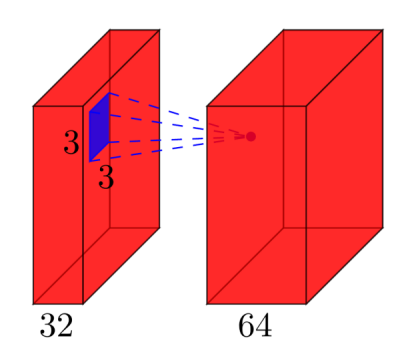

In [45]:
from IPython.display import Image
Image(filename='E:\\tensorFlow\\kernelImg.PNG')

In [25]:
#1179776/128
#9217/32
# dense_13 10 * 128 * 1


#print(((3*3) * 32 + 1) * 64)
#print((3 * 3 * 32+1) * 64)
 # https://m.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca
    
# Convolutional Layer: Consider a convolutional layer which takes “l” feature maps as the input
# and has “k” feature maps as output. The filter size is “n*m”.
#print(((3*3) * 1 + 1) * 32)   # “(n*m*l+1)*k   => n = 3, m=3   , l is 32 feature maps
# It is important to understand, that we don’t simply have a 3*3 filter, but actually, 
# we have 3*3*32 filter, as our input has 32 dimensions


# Convolutional_1 : ((kernel_size)*stride+1)*filters) = 3*3*1+1*32 = 320 parameters.
# In first layer, the convolutional layer has 32 filters.
print(((3*3) * 1 + 1) * 32)  

320


In [39]:
# In the simple case, the size of the output CNN layer is calculated as “input_size-(filter_size-1)”
(28 - (3-1))

26

In [26]:
# Convolutional_2 : As convolutional_1 already learned 32 filters. So the number of 
# trainable parameters in this layer is 3 * 3 * 32 + 1 * 64 = 18496 and so on.

print( (3 * 3 * 32 + 1) * 64)

18496


In [ ]:
# max pooling
# This layer is used to reduce the input image size. kernal_size = (2,2) used here. 
# So input image 96 is reduced to half 48. And model learns nothing from this layer.

In [ ]:
# Dropout_1: Dropout layer does nothing. It just removes the nodes that are below the weights mentioned.

In [27]:
# Flatten

(9216 +1 )* 128   # superb here the 9216 is the input from Flatten n+1 => 9216+1, 
#no of outputs  128 (m) => (n+1) * m
#1179776   

1179776

In [ ]:
# Pooling Layer: There are no parameters you could learn in pooling layer.
# This layer is just used to reduce the image dimension size.

# To reduce Overfitting

* To reduce over-fitting, we use another technique known as Data Augmentation. Data augmentation rotates, 
* shears, zooms, etc the image so that the model learns to generalize and not remember specific data. If the model overfits, 
* it will perform very well on the images that it already knows but will fail if new images are given to it.

# https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/

In [36]:
! pip install pydot

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [62]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [64]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [65]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
937/937 [==============================] - 166s 177ms/step - loss: 0.1638 - accuracy: 0.9506 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 2/5
937/937 [==============================] - 150s 160ms/step - loss: 0.1085 - accuracy: 0.9673 - val_loss: 0.0251 - val_accuracy: 0.9919
Epoch 3/5
937/937 [==============================] - 152s 162ms/step - loss: 0.0918 - accuracy: 0.9723 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 4/5
937/937 [==============================] - 151s 161ms/step - loss: 0.0823 - accuracy: 0.9757 - val_loss: 0.0286 - val_accuracy: 0.9908
Epoch 5/5
937/937 [==============================] - 152s 162ms/step - loss: 0.0772 - accuracy: 0.9773 - val_loss: 0.0207 - val_accuracy: 0.9925


In [70]:
score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

ValueError: in user code:

    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:912 test_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
'''
If you want to see the actual predictions that our model has made for the test data, 
we can use the predict function. The predict function will give an array with 10 numbers. 
These numbers are the probabilities that the input image represents each digit (0–9). 
The array index with the highest number represents the model prediction. 
The sum of each array equals 1 (since each number is a probability).
'''

In [69]:
import pandas as pd
predictions = model.predict_classes(x_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

In [70]:

class MixIterator(object):
    def __init__(self, iters):
        self.iters = iters
        self.N = sum([it.n for it in self.iters])

    def reset(self):
        for it in self.iters: it.reset()

    def __iter__(self):
        return self

    def __next__(self, *args, **kwargs):
        nexts = [next(it) for it in self.iters]
        n0 = np.concatenate([n[0] for n in nexts])
        n1 = np.concatenate([n[1] for n in nexts])
        return (n0, n1)

In [72]:
predictions = model.predict(x_test, batch_size=64)

predictions[:5]

array([[3.5645675e-13, 2.6678076e-10, 9.8139514e-09, 6.1160385e-08,
        2.1674036e-13, 5.0108265e-11, 2.2770778e-19, 9.9999988e-01,
        7.3061203e-11, 1.6636307e-08],
       [3.2581323e-08, 5.5112021e-05, 9.9994481e-01, 4.8457194e-09,
        2.1425978e-10, 2.1800216e-12, 3.8701002e-09, 1.3220659e-08,
        2.3200446e-09, 6.0986476e-12],
       [1.1614095e-09, 9.9999976e-01, 5.4383731e-10, 9.1767765e-12,
        2.4593289e-08, 1.0132690e-07, 2.7544175e-08, 8.4743867e-08,
        3.4766920e-09, 6.9403328e-10],
       [9.9967265e-01, 1.2984507e-08, 3.7590857e-07, 4.1414984e-07,
        1.1715706e-07, 4.9076795e-07, 3.0868410e-04, 1.5429103e-08,
        8.9908724e-07, 1.6394784e-05],
       [2.4573074e-12, 5.7904837e-11, 8.0371972e-13, 2.3502157e-15,
        9.9999964e-01, 2.1257596e-11, 5.3478738e-10, 2.0108012e-12,
        1.4076171e-10, 3.6291536e-07]], dtype=float32)

In [75]:
# gen = ImageDataGenerator()

batches = gen.flow(x_train, y_train, batch_size=48)
test_batches = test_gen.flow(x_test, predictions, batch_size=16)

In [76]:

mi = MixIterator([batches, test_batches])

mi.N

70000

In [78]:
model.fit_generator(mi, steps_per_epoch=mi.N//64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1093/1093 [==============================] - 185s 169ms/step - loss: 0.0651 - accuracy: 0.9808 - val_loss: 0.0242 - val_accuracy: 0.9922
Epoch 2/5
1093/1093 [==============================] - 183s 167ms/step - loss: 0.0655 - accuracy: 0.9823 - val_loss: 0.0234 - val_accuracy: 0.9927
Epoch 3/5
1093/1093 [==============================] - 183s 167ms/step - loss: 0.0586 - accuracy: 0.9843 - val_loss: 0.0243 - val_accuracy: 0.9928
Epoch 4/5
1093/1093 [==============================] - 184s 168ms/step - loss: 0.0586 - accuracy: 0.9835 - val_loss: 0.0197 - val_accuracy: 0.9935
Epoch 5/5
1093/1093 [==============================] - 183s 168ms/step - loss: 0.0548 - accuracy: 0.9844 - val_loss: 0.0216 - val_accuracy: 0.9928


# Compile the model

In [59]:
# Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.
# The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good 
# optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is 
# responsible for updating the weights of the neurons via backpropagation. It calculates the derivative 
# of the loss function with respect to each weight and subtracts it from the weight. 

# The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer.
# Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts
# the learning rate throughout training.

# We will use ‘categorical_crossentropy’ for our loss function. This is the most 
# common choice for classification. A lower score indicates that the model is performing better.
# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
# Here we compile our CNN and set the opimiser as rmsprop. We can set other 
# optimisers like adam and adadelta depending on the output.
## We will use ‘categorical_crossentropy’ for our loss function. This is the most common 
# choice for classification. A lower score indicates that the model is performing better.

### Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size). 

# Fit the model

In [57]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[tensorboard])



# The number of epochs is the number of times the model will cycle through the data. The more epochs we run,
# the more the model will improve, up to a certain point. After that point, the model will stop improving during
# each epoch. For our model, we will set the number of epochs to 3.


Epoch 1/2
469/469 [==============================] - 168s 358ms/step - loss: 0.2525 - accuracy: 0.9228 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 2/2
469/469 [==============================] - 150s 320ms/step - loss: 0.0873 - accuracy: 0.9743 - val_loss: 0.0383 - val_accuracy: 0.9871


# Evaluate the model
* We have 10,000 images in our dataset which will be used to evaluate how good our model works. 
* The testing data was not involved in the training of the data therefore, it is new data for our model. 
* The MNIST dataset is well balanced so we can get around 99% accuracy.

In [59]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03826835751533508
Test accuracy: 0.9871000051498413


## Accuracy Plot

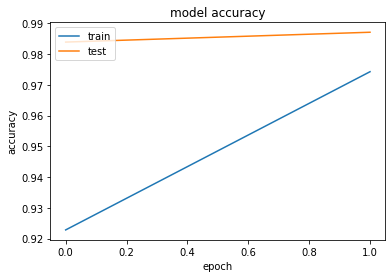

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
history.history['accuracy']

[0.9228166937828064, 0.9742666482925415]

## Loss Plot

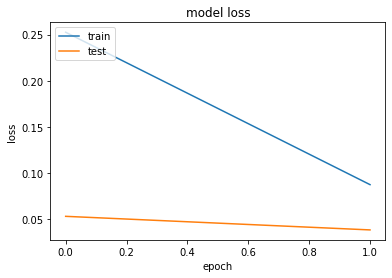

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# If you want to see the actual predictions that our model has made for the test data, 
# we can use the predict function. The predict function will give an array with 10 numbers.
# These numbers are the probabilities that the input image represents each digit (0–9). 
# The array index with the highest number represents the model prediction.
# The sum of each array equals 1 (since each number is a probability).

In [25]:
pred = model.predict(x_test)
pred[0]

array([1.1062320e-11, 2.5687902e-12, 1.5028637e-09, 7.3829769e-09,
       6.3939956e-12, 2.0561957e-11, 6.6668273e-15, 9.9999976e-01,
       8.4679711e-12, 2.8373665e-07], dtype=float32)

In [65]:
pred = model.predict(x_test[0:])
pred[0]

array([0.10121591, 0.09570368, 0.09986495, 0.09763329, 0.10268085,
       0.09873804, 0.10221619, 0.10231913, 0.09982197, 0.09980603],
      dtype=float32)

In [29]:
np.argmax(pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
x_test[0].shape


(28, 28, 1)

In [ ]:
# As you can see, most of the values are very small numbers (very low probability that the picture belongs
# to this class), except for the number at position 7 (counted from 0). Numpy has a very useful function 
# that will save our eyes and 
# immediately tell us which class was rated by the model as the most probable.

In [144]:
np.argmax(pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

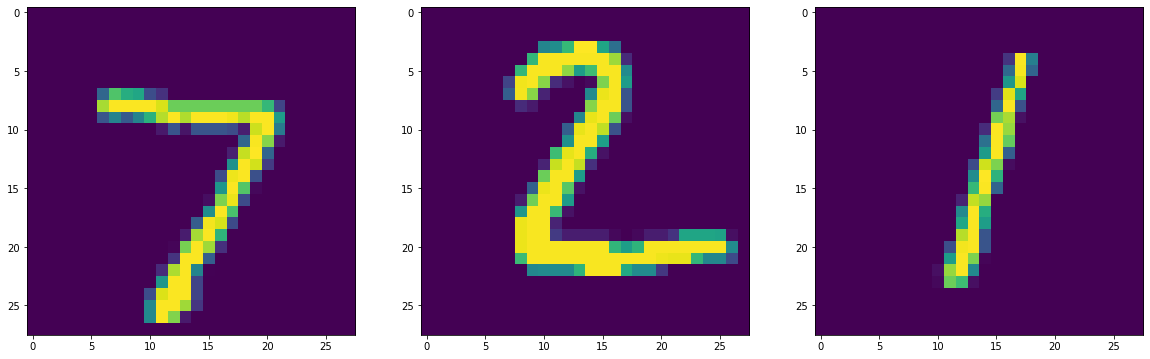

In [145]:
n = 3
plt.figure(figsize = (20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
plt.show()

In [67]:
np.argmax(pred[0])

4

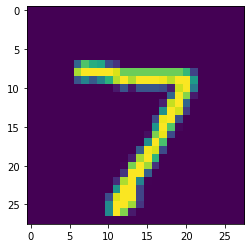

In [68]:
plt.imshow(x_test[0].reshape(28,28))

In [69]:
np.argmax(pred, axis=1)

array([4, 9, 2, ..., 9, 1, 9], dtype=int64)

In [ ]:
# https://iq.opengenus.org/building-convolution-neural-network-keras-python/

In [ ]:
# https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/


In [ ]:
np.argmax(pred, axis=1) == x_test

In [19]:
np.mean(np.argmax(pred, axis=1) == x_test)

NameError: name 'pred' is not defined

In [60]:
# https://nextjournal.com/gkoehler/digit-recognition-with-keras
import os
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=128, epochs=2,
          verbose=2,
          validation_data=(x_test, y_test))

# saving the model
save_dir = "D:/dat1/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Epoch 1/2


ValueError: in user code:

    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Home\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


# wrong prediction

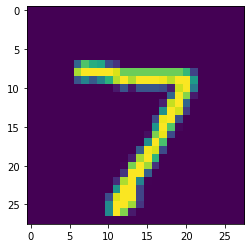

Label for the element 0 : [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

In [140]:
wrong_pred = np.argmin(np.argmax(pred, axis=1) == x_test[0:100])
wrong_pred
element = wrong_pred
plt.imshow(x_test[element].reshape(28,28))
plt.show()
print("Label for the element", element,":", x_test[element])
print("Prediction for the element:", np.argmax(pred[element]))

In [61]:
model.save(r'D:/dat6/cnn')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:/dat6/cnn\assets


TypeError: Invalid shape (28, 28, 1) for image data

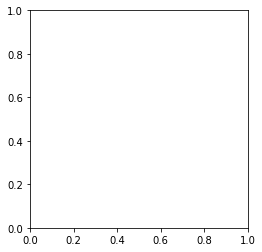

In [62]:
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.show()

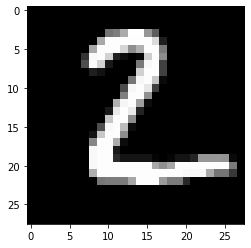

In [52]:
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#actual results for first 4 images in test set
y_test[:4]

In [ ]:
import keras

In [ ]:
x1 = tf.constant([1,2,3,4])

In [3]:
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

# tbc=TensorBoardColab()import tensorflow as tf


0  classified correctly
1  classified incorrectly


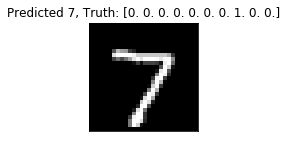

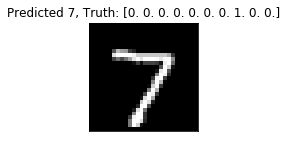

In [54]:
#"D:/dat1/"
#model_name = 'keras_mnist.h5'
# load the model and create predictions on the test set
mnist_model = load_model("D:/dat1/keras_mnist.h5")
predicted_classes = model.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [56]:
# As we can see, the wrong predictions are quite forgiveable since they're in some 
# cases even hard to recognize for the human reader. 

# In summary we used Keras with a Tensorflow backend on a GPU-enabled server to 
# train a neural network to recognize handwritten digits in under 20 seconds of 
# training time - all that without having to spin up any compute instances, only using our browser.

# Hyper parameter 

In [ ]:
def create_model(hparams):
    model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    #setting the Drop out value based on HParam
    Dropout(hparams[HP_DROPOUT]),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(hparams[HP_DROPOUT]),
    Flatten(),
    Dense(hparams[HP_NUM_UNITS], activation='relu'),
    Dense(2, activation='softmax')])
    
    #setting the optimizer and learning rate
    optimizer = hparams[HP_OPTIMIZER]
    learning_rate = hparams[HP_LEARNING_RATE]
    if optimizer == "adam":
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer=='rmsprop':
        optimizer = tf.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("unexpected optimizer name: %r" % (optimizer_name,))
    
    # Comiple the mode with the optimizer and learninf rate specified in hparams
    model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    #Fit the model 
    history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=1000,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000,
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir),  # log metrics
        hp.KerasCallback(log_dir, hparams),# log hparams
        
    ])
    return history.history['val_accuracy'][-1]